# Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

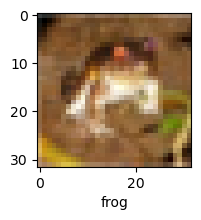

In [11]:
plot_sample(x_train, y_train, 0)

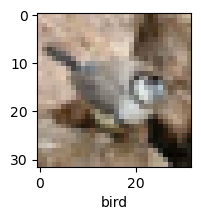

In [12]:
plot_sample(x_train, y_train, 90)

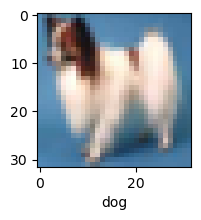

In [13]:
plot_sample(x_train, y_train, 4000)

In [14]:
# Normalizing the training data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3080 - loss: 1.9262
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4227 - loss: 1.6439
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.4526 - loss: 1.5558
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.4744 - loss: 1.4806
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4970 - loss: 1.4387


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.60      0.51      1000
           1       0.67      0.47      0.56      1000
           2       0.35      0.38      0.36      1000
           3       0.37      0.30      0.33      1000
           4       0.47      0.32      0.38      1000
           5       0.51      0.24      0.33      1000
           6       0.41      0.72      0.52      1000
           7       0.65      0.46      0.53      1000
           8       0.45      0.77      0.56      1000
           9       0.61      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



# Now let us build a convolutional neural network to train our images

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.4046 - loss: 1.6503
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6077 - loss: 1.1261
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6673 - loss: 0.9688
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.6977 - loss: 0.8701
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7225 - loss: 0.8065
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.7418 - loss: 0.7488
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7596 - loss: 0.6888
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7769 - loss: 0.6411
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7913 - loss: 0.6008
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8088 - loss: 0.5514


In [21]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7141 - loss: 0.8939


[0.9133023619651794, 0.7093999981880188]

In [31]:
y_pred = cnn.predict(x_test)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[2.05821616e-05, 1.81606283e-05, 8.42754598e-05, 9.74277794e-01,
        9.43592968e-05, 2.48454064e-02, 1.58334660e-04, 1.05522549e-05,
        4.73139662e-04, 1.74462930e-05],
       [1.43321976e-03, 9.84582081e-02, 2.52624286e-05, 2.08761278e-07,
        2.83887999e-07, 4.88724616e-09, 8.19983654e-08, 2.05946069e-08,
        8.98724020e-01, 1.35860278e-03],
       [8.81190225e-03, 1.84877053e-01, 4.89416416e-04, 6.21483603e-04,
        1.32326619e-04, 1.29655862e-04, 6.47723427e-05, 7.75772060e-05,
        7.97549665e-01, 7.24616461e-03],
       [8.65040481e-01, 1.27379969e-02, 6.16635522e-03, 1.95897487e-03,
        2.95855496e-02, 3.41706036e-05, 4.48282517e-05, 8.96994118e-03,
        7.51685798e-02, 2.93076650e-04],
       [2.32006687e-06, 2.82959973e-05, 4.34752926e-03, 1.56408727e-01,
        3.68518174e-01, 9.35066375e-04, 4.69746858e-01, 1.91226505e-07,
        1.20451950e-05, 8.15001215e-07],
       [1.18523330e-05, 2.16243334e-05, 1.13965660e-04, 7.67400838e-04,
   

In [29]:
# Predicted output 
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [30]:
# Output
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

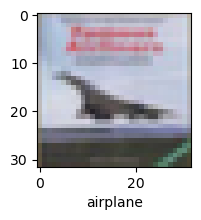

In [27]:
plot_sample(x_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'

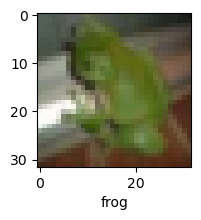

In [32]:
plot_sample(x_test, y_test,7)

In [33]:
classes[y_classes[7]]

'frog'

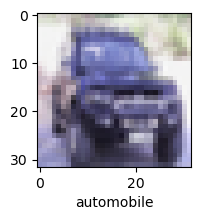

In [34]:
plot_sample(x_test, y_test,9)

In [35]:
classes[y_classes[9]]

'automobile'

In [36]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.78      0.84      0.81      1000
           2       0.66      0.58      0.62      1000
           3       0.55      0.48      0.51      1000
           4       0.61      0.72      0.66      1000
           5       0.59      0.65      0.62      1000
           6       0.81      0.76      0.78      1000
           7       0.74      0.75      0.74      1000
           8       0.84      0.79      0.81      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

